In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

148

In [9]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

<AxesSubplot: xlabel='reason', ylabel='count'>

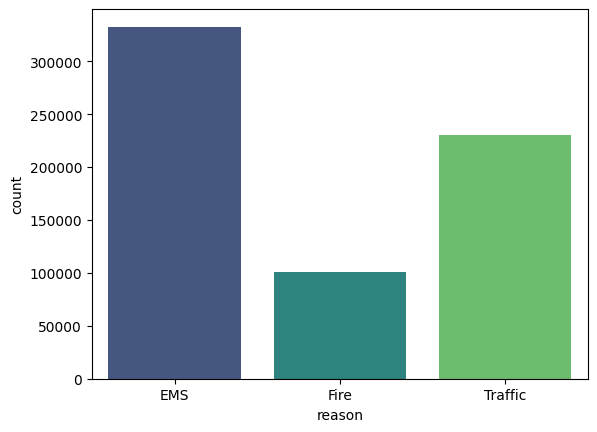

In [11]:
sns.countplot(x='reason', data=df, palette='viridis')

In [12]:
type(df['timeStamp'].iloc[1])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
time = df['timeStamp'].iloc[3]

In [16]:
time.day_of_week

3

In [17]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply((lambda x: x.dayofweek))

In [18]:
df['day of week'].value_counts()

4    102942
2     99157
3     98683
1     97684
0     96745
5     89452
6     78859
Name: day of week, dtype: int64

In [19]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [20]:
df['day of week'] = df['day of week'].map(dmap)

In [21]:
df['day of week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: day of week, dtype: object

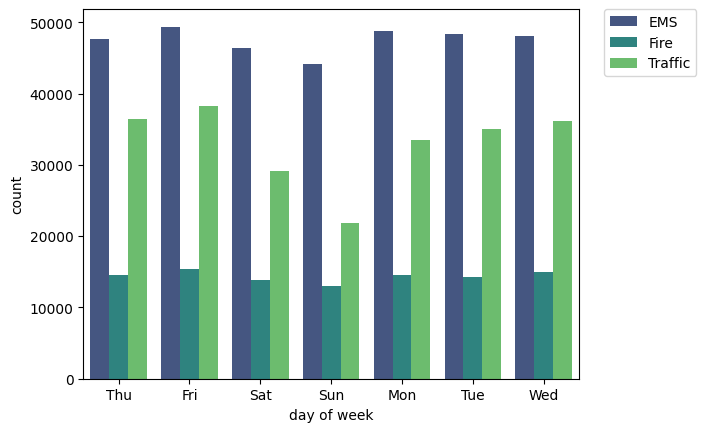

In [22]:
sns.countplot(x= 'day of week', data= df, hue='reason', palette= 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

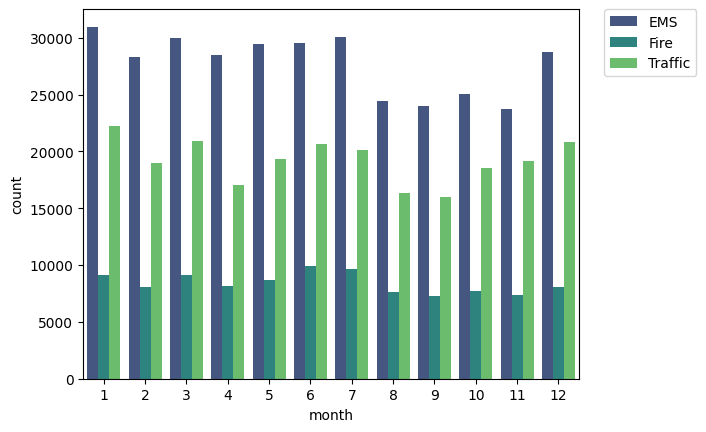

In [23]:
sns.countplot(x= 'month', data= df, hue='reason', palette= 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
by_month = df.groupby('month').count()

In [25]:
by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot: xlabel='month'>

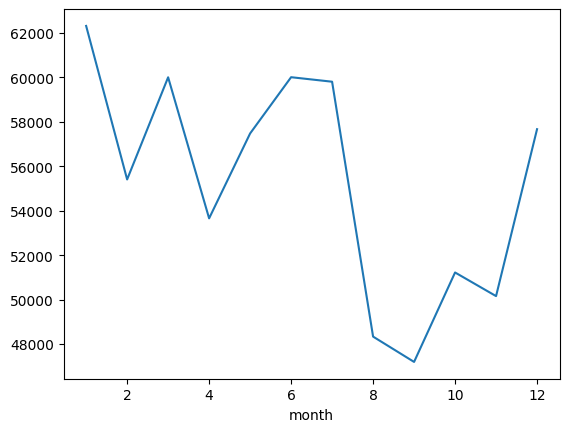

In [26]:
by_month['twp'].plot()

In [27]:
by_month = by_month.reset_index()

In [28]:
by_month

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


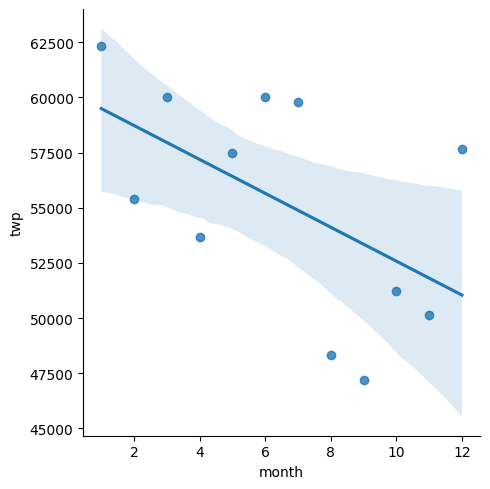

In [29]:
sns.lmplot(x='month', y='twp', data=by_month)

In [30]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [31]:
df['date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

In [32]:
df.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


<AxesSubplot: xlabel='date'>

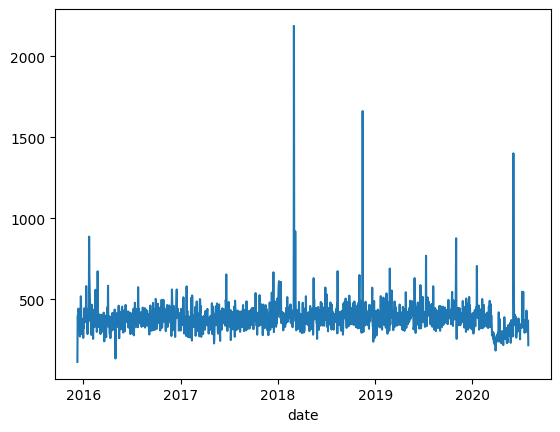

In [33]:
df.groupby('date').count()['twp'].plot()

<AxesSubplot: xlabel='date'>

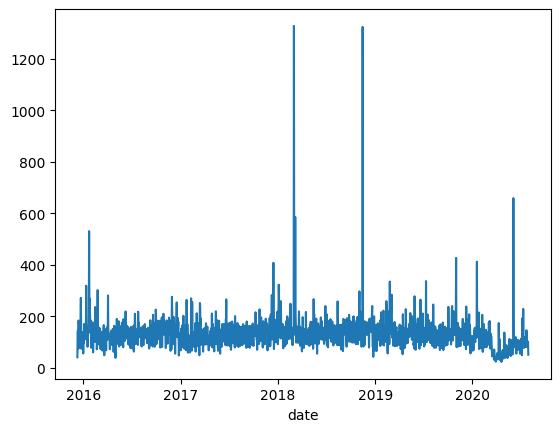

In [34]:
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()

<AxesSubplot: xlabel='date'>

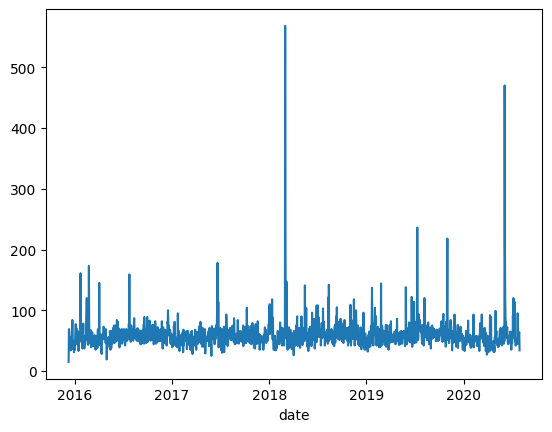

In [35]:
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot()

<AxesSubplot: xlabel='date'>

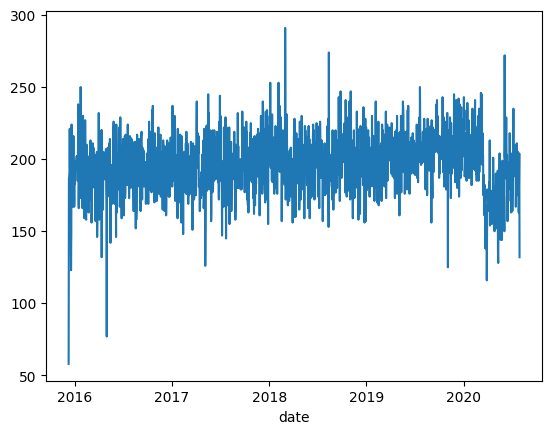

In [36]:
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()

In [37]:
day_hour = df.groupby(by=['day of week', 'hour']).count()['twp'].unstack()


<AxesSubplot: xlabel='hour', ylabel='day of week'>

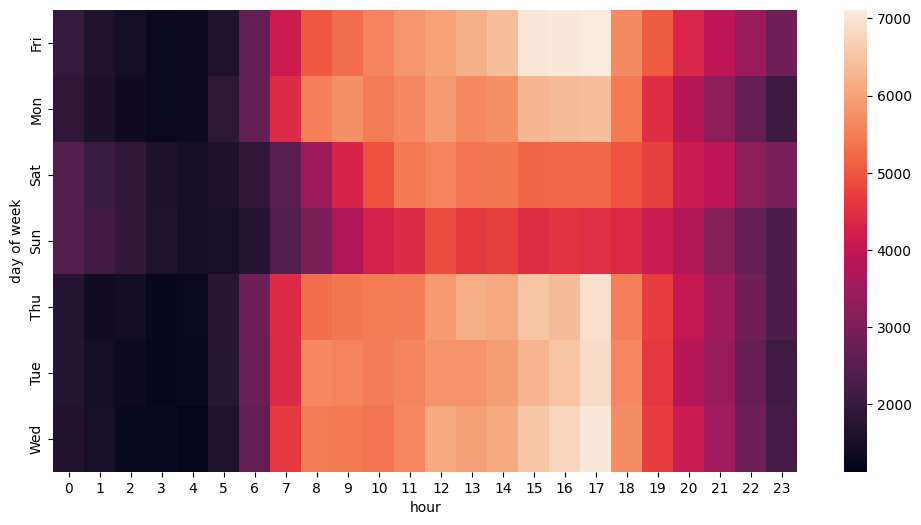

In [38]:
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour)

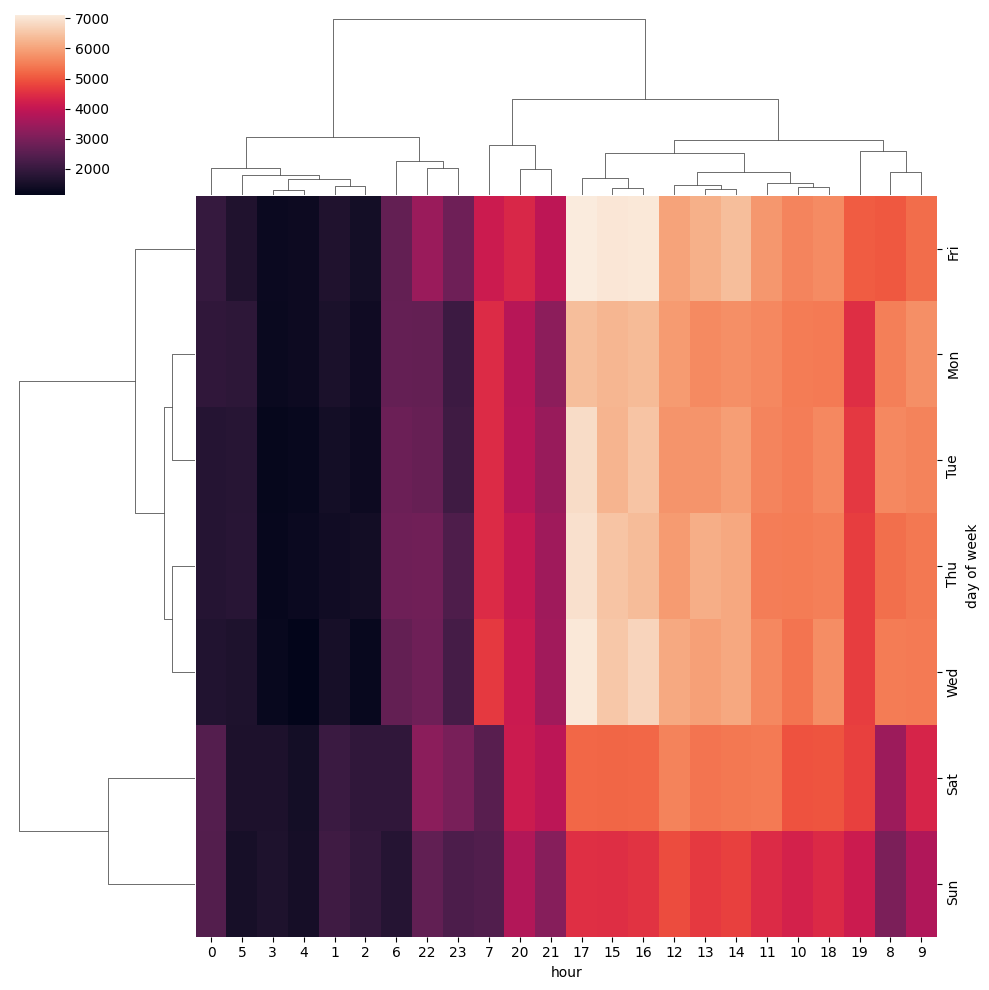

In [39]:
sns.clustermap(day_hour)

In [41]:
day_hour = df.groupby(by=['day of week', 'month']).count()['twp'].unstack()

<AxesSubplot: xlabel='month', ylabel='day of week'>

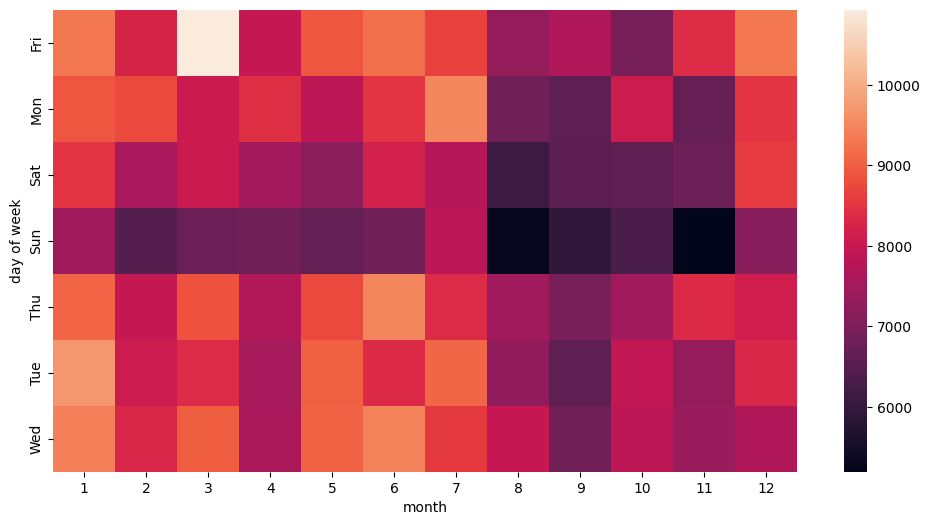

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour)

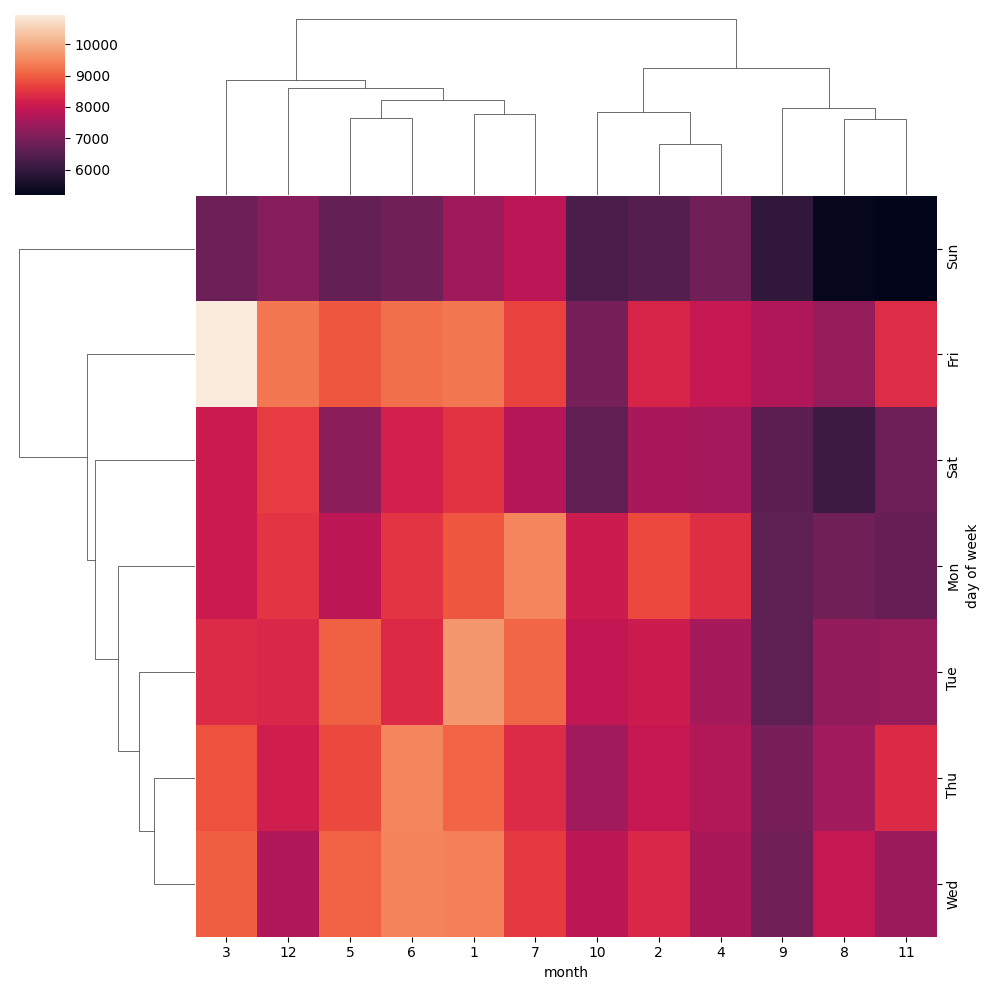

In [43]:
sns.clustermap(day_hour)